In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np

In [3]:
sys.path.append('../../')

In [4]:
import SimulationFramework.Framework as fw

In [13]:
basedir=r'C:\Users\jkj62\Documents\GitHub\ASTRA_COMPARISONRunner-HMCC\dist\output\SimulationDatabase'
dir='a8041d43-ddea-493d-af59-adc34458b686'
fwdir = fw.load_directory(basedir+'/'+dir, beams=True)

# Needs fastKDE
pip install cython, fastkde

In [9]:
from fastkde import fastKDE
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (20,20)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 70 # 200 e.g. is really fine, but slower%matplotlib inline

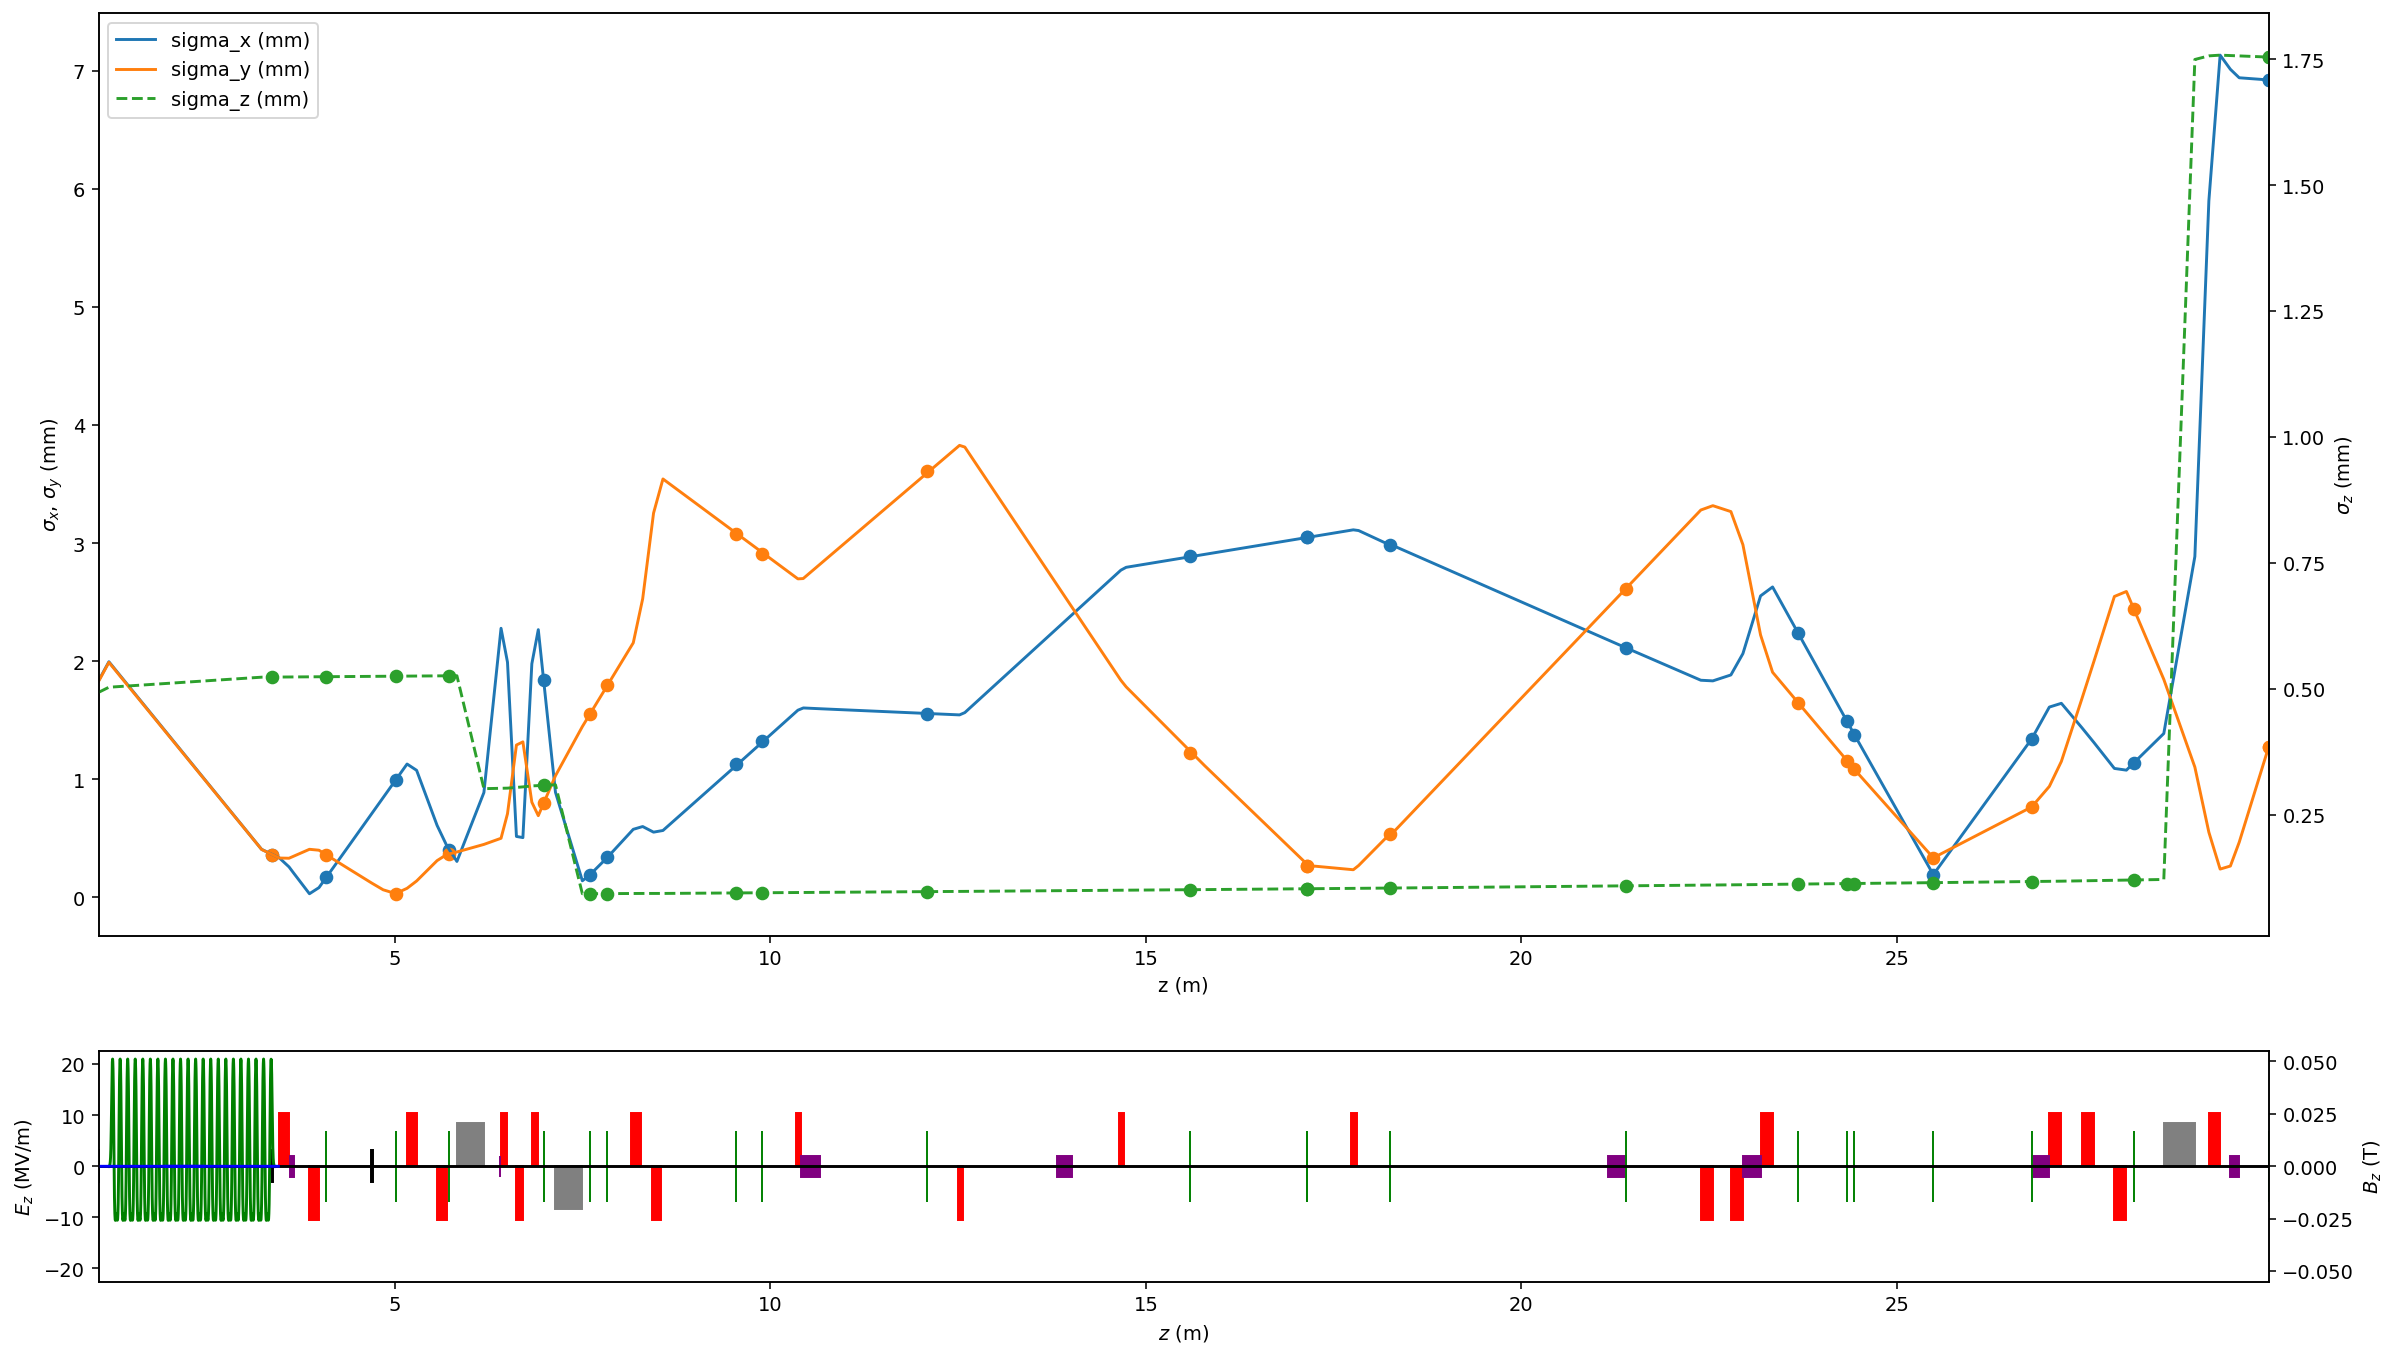

In [10]:
fwdir.plot(include_layout=True, include_particles=True)

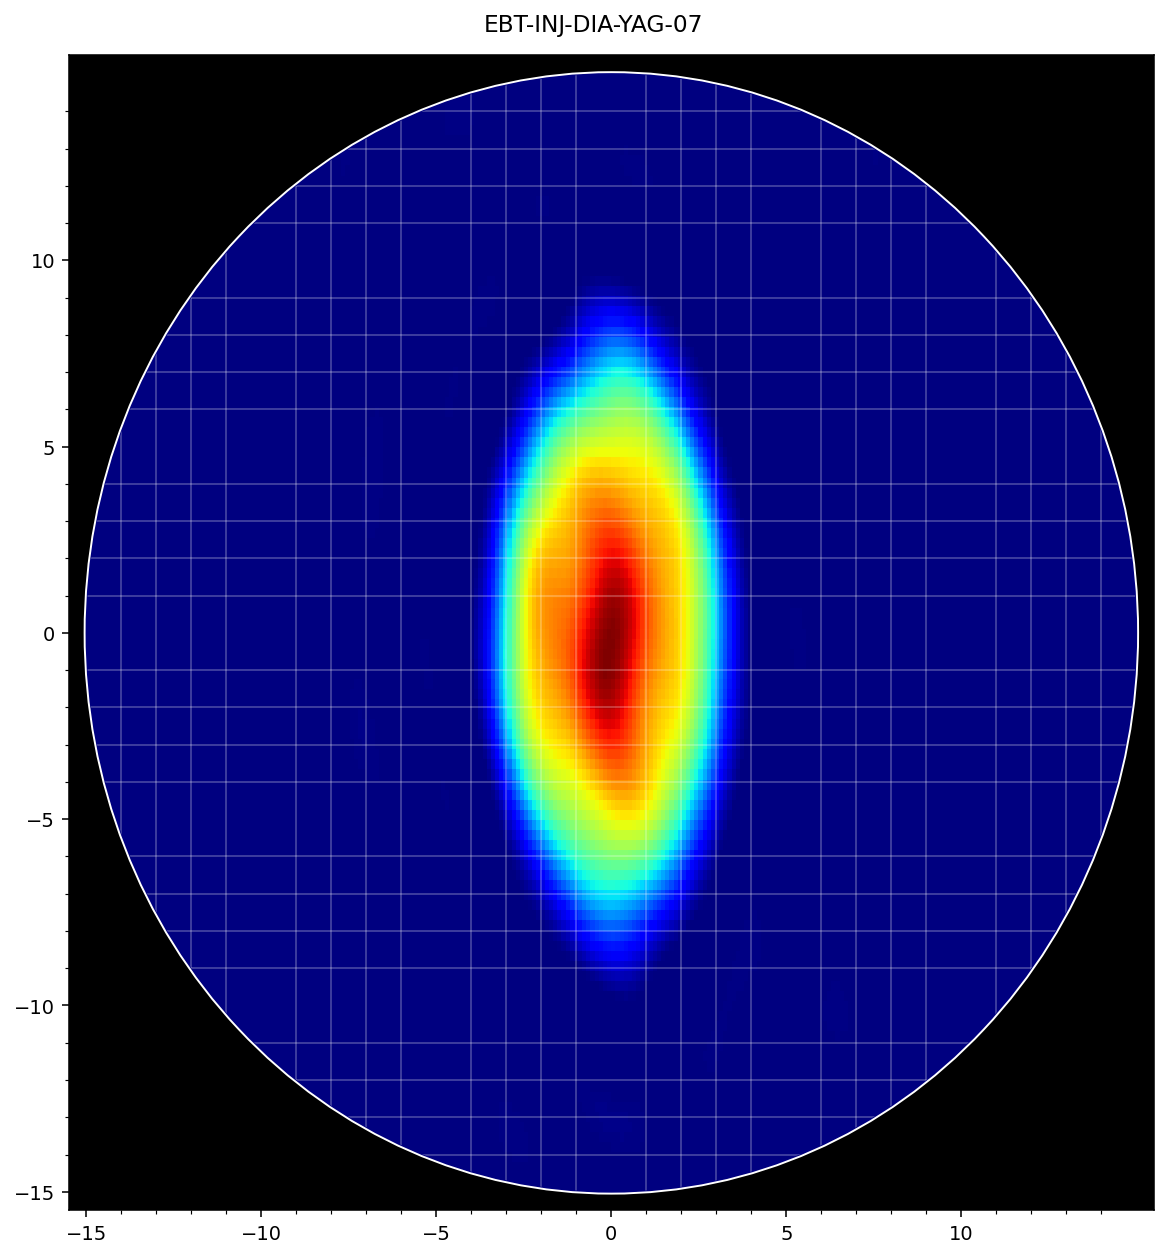

In [12]:
fwdir.beams.getScreen('EBT-INJ-DIA-YAG-07').plotScreenImage(scale=1, colormap=plt.cm.jet, screen=True)